In [15]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

In [5]:
np.pi
np.random.uniform(0,1)

0.7319939418114051

In [19]:
class Proposal:
    def __init__(self, mean=0):
        self.mean = mean
        self.sigma = 0.1

    def sample(self):
        return np.random.normal(self.mean, self.sigma)
    
    def evolve(self, mean):
        self.mean = mean

    def evaluate(self, x):
        return ( 1 / np.sqrt(2*np.pi*self.sigma*self.sigma) ) * np.exp (-(x - np.mean)*(x - np.mean)/(2*self.sigma*self.sigma)) 
    
proposal_function = Proposal()
proposal_function.sample()

0.04967141530112327

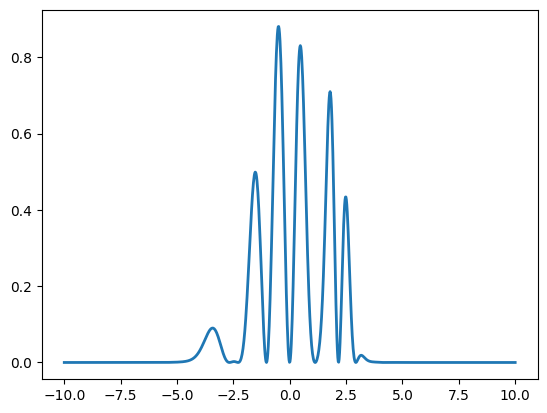

In [33]:
def complicated_function(x):
    return (
        np.sin(3 * x) * np.exp(-x**2 / 5) + 
        0.5 * np.cos(5 * x) * np.exp(-(x - 2)**2) +
        0.25 * np.exp(-((x + 3)**2) / 2)
    )**2
x = np.linspace(-10,10,1000)
y = complicated_function(x)
plt.plot(x, y, label='complicated_function(x)', linewidth=2)
plt.show()

In [6]:
def metropolis_hasting(current_state, proposal_function, original_function):
    acceptance_prob = 0.1
    new_state = proposal_function.sample()
    alpha = original_function(new_state)/original_function(current_state)
    if alpha >= 1:
        proposal_function.evolve(new_state)
        return new_state, proposal_function
    if np.random.uniform(0,1) < acceptance_prob:
        proposal_function.evolve(new_state)
        return new_state, proposal_function
    else: 
        return new_state,proposal_function

In [21]:
from tqdm import tqdm

100%|██████████| 1000000/1000000 [00:16<00:00, 60254.25it/s]


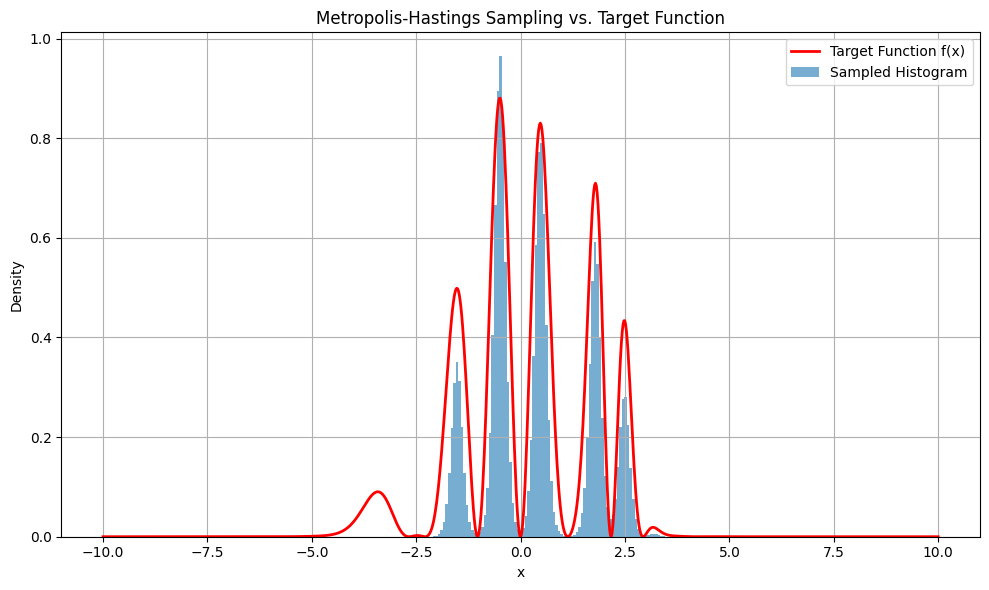

In [35]:
n_samples = 1000000
samples = np.zeros(n_samples)
proposal_function = Proposal()

current_state = 0
new_state = 0
for i in tqdm(range(n_samples)):
    while current_state == new_state:
        new_state, proposal_function = metropolis_hasting(current_state, proposal_function, complicated_function)
    samples[i] = new_state
    current_state = new_state

x = np.linspace(-10,10,1000)
y = complicated_function(x)
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Target Function f(x)', color='red', linewidth=2)
plt.hist(samples, bins=100, density=True, alpha=0.6, label='Sampled Histogram')
plt.title("Metropolis-Hastings Sampling vs. Target Function")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()